## Classifying songs to music genres by using logistic regression and support vector machine method

## Abstract

We experimented with several different machine-learning algorithm to classify songs to music genres. Our best performing algorithm in terms of accuracy was standardized logarithmic regression that achieved 65.308% accuracy on Kaggel and the best in terms of logarithmic loss was standardized SVM that achieved log loss of 0.16908. We also tried dimensional reduction with linear discriminant analysis that seemed to slightly increase our accuracy and reduce log loss on training data but that did not translate on Kaggle as a better performance.

## 1. Introduction

The aim of this project was to design a complete-machine learning solution for classifying songs to 10 different genres by using supervised machine learning methods meaning that the model was trained with labeled data. This problem could have been approached with semi-supervised learning methods as well were data is only partly trained with labeled data and then it is trained with unlabeled data. 

Genres (labels) were represented as a natural numbers so we could use a binary classification methods for this multiclass task by applying so called “one vs all” technique so that each class was compared to the rest of the classes one class at a time.

The performance of these methods were compared based on multiclass logarithmic loss and categorical accuracy but other (maybe better) metrics exist as well to measure performance. 

This project should give a basic understanding of model building in the machine learning pipeline and also encourage to dig deeper into the course material and the world of machine learning (we really hope so).


## 2. Data analysis

The training data set consist of 4363 samples described by 264 features (dimensions). These features were divided in three groups: rhythm, chroma and MFCC. Some of the features had quite different max values that called for standardizing the data. 

The training data was seemingly quite imbalanced and most of the songs belonged to pop-rock genre. This could be a problem and cause machine-learning model to over-/underfit on some of these classes. The imbalance problem should also be considered when splitting the data into test and validation sets so that both sets have data points from all of the classes. 

Imbalanced data can be a problem 

We plotted averages of each feature on standardized data for each genre to see whether if we could identify features that were similar to all classes (maybe redundant features) or features that would be distinctively different for individual classes (maybe we could tune our algorithms to put more importance to those features). Rap, Jazz and Reggae were clearly distinct in some of the features. For more accurate analysis variance measures would be needed as well but we concluded that we don't have the required skills to tackle that problem. 


In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import itertools
import csv

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

from sklearn.model_selection import StratifiedKFold

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [2]:
train_data = pd.read_csv("train_data.csv", index_col= False, header = None)
train_labels = pd.read_csv("train_labels.csv", header = None, index_col = False)
kaggle_test_data = pd.read_csv("test_data.csv", header = None, index_col = False)

In [3]:
genres = ['Pop_Rock', 'Electronic', 'Rap', 'Jazz', 'Latin', 'RnB', 'International', 'Country', 'Reggae', 'Blues']

In [4]:
train_data = np.array(train_data)
train_labels = np.array(train_labels).flatten()
kaggle_test_data = np.array(kaggle_test_data)

Text(0.5,1,'distribution of classes')

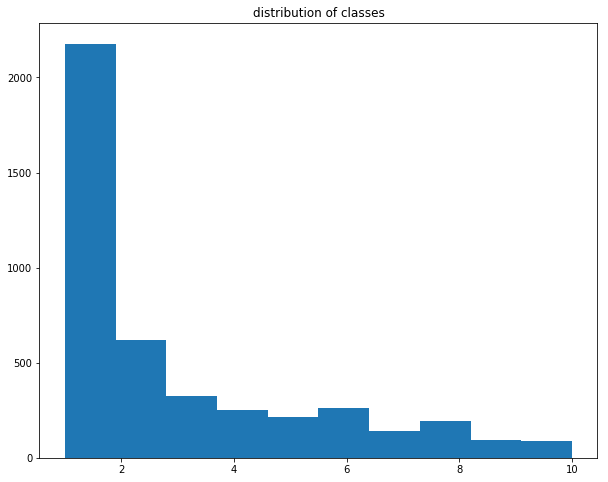

In [5]:
plt.figure(figsize=(10,8))
plt.hist(train_labels)
plt.title("distribution of classes")

In [6]:
min = []
max = []

for i in range(263):   
    
    min.append(train_data[:, i].min())
    max.append(train_data[:, i].max())  

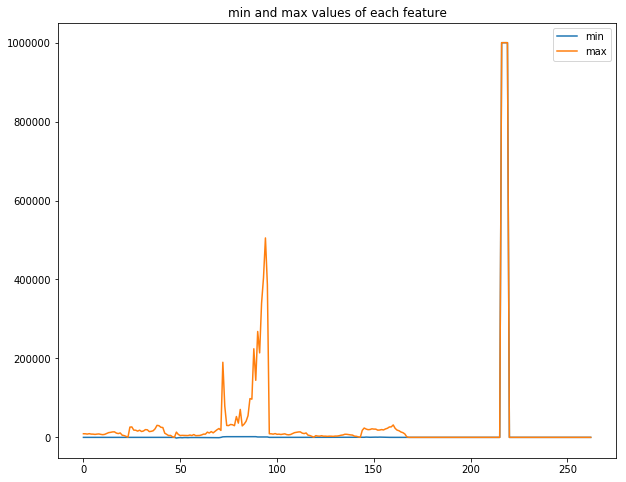

In [7]:
plt.figure(figsize=(10,8))
plt.plot(min, label = "min")
plt.plot(max, label = "max")
plt.title("min and max values of each feature")
plt.legend(bbox_to_anchor=(1, 1))

In [8]:
scaler = StandardScaler().fit(train_data)
scaled_train_data = scaler.transform(train_data)

genre_1 = []
genre_2 = []
genre_3 = []
genre_4 = []
genre_5 = []
genre_6 = []
genre_7 = []
genre_8 = []
genre_9 = []
genre_10 = []

for i in range(263):   
    
    mean_1 = []
    mean_2 = []
    mean_3 = []
    mean_4 = []
    mean_5 = []
    mean_6 = []
    mean_7 = []
    mean_8 = []
    mean_9 = []
    mean_10 = [] 
                  
    for k in range(len(train_data)):
                
        if train_labels[k] == 1:            
            mean_1.append(scaled_train_data[k, i])
        if train_labels[k] == 2:
            mean_2.append(scaled_train_data[k, i])
        if train_labels[k] == 3:    
            mean_3.append(scaled_train_data[k, i])
        if train_labels[k] == 4:
            mean_4.append(scaled_train_data[k, i])
        if train_labels[k] == 5:    
            mean_5.append(scaled_train_data[k, i])
        if train_labels[k] == 6:  
            mean_6.append(scaled_train_data[k, i])
        if train_labels[k] == 7:    
            mean_7.append(scaled_train_data[k, i])
        if train_labels[k] == 8:  
            mean_8.append(scaled_train_data[k, i])
        if train_labels[k] == 9:    
            mean_9.append(scaled_train_data[k, i])
        if train_labels[k] == 10: 
            mean_10.append(scaled_train_data[k, i])
                
    genre_1.append(np.mean(mean_1))
    genre_2.append(np.mean(mean_2))
    genre_3.append(np.mean(mean_3))
    genre_4.append(np.mean(mean_4))
    genre_5.append(np.mean(mean_5))   
    genre_6.append(np.mean(mean_6))
    genre_7.append(np.mean(mean_7))
    genre_8.append(np.mean(mean_8))
    genre_9.append(np.mean(mean_9))
    genre_10.append(np.mean(mean_10))

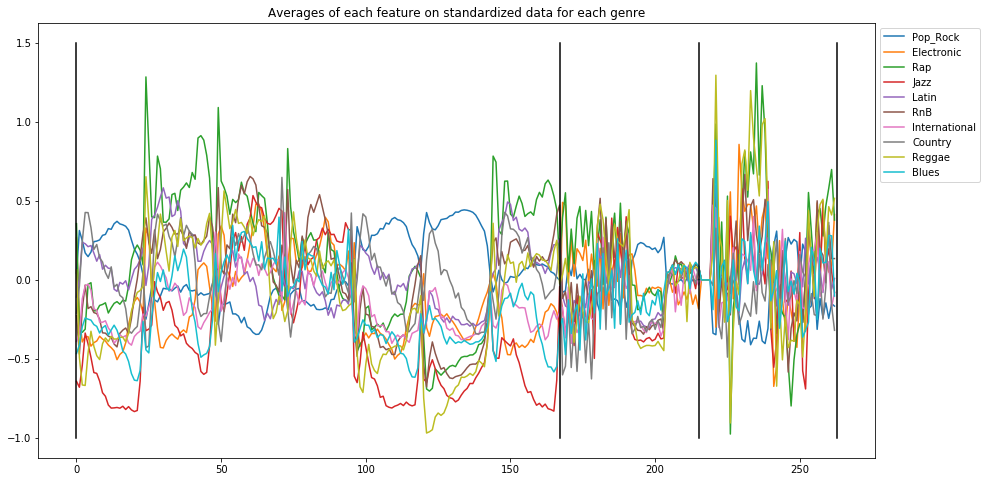

In [9]:
plt.figure(figsize=(15,8))
plt.title("Averages of each feature on standardized data for each genre")

plt.plot(genre_1, label = 'Pop_Rock')
plt.plot(genre_2, label = 'Electronic')
plt.plot(genre_3, label = 'Rap')
plt.plot(genre_4, label = 'Jazz')
plt.plot(genre_5, label = 'Latin')
plt.plot(genre_6, label = 'RnB')
plt.plot(genre_7, label = 'International')
plt.plot(genre_8, label = 'Country')
plt.plot(genre_9, label = 'Reggae')
plt.plot(genre_10, label = 'Blues')

# black line to separate feature groups

x_1=[0,0];
y_1=[-1,1.5];
plt.plot(x_1,y_1, color = "black")

x_1=[167,167];
y_1=[-1,1.5];
plt.plot(x_1,y_1, color = "black")

x_2=[215,215];
y_2=[-1,1.5];
plt.plot(x_2,y_2, color = "black")

x_2=[263,263];
y_2=[-1,1.5];
plt.plot(x_2,y_2, color = "black")


plt.legend(bbox_to_anchor=(1, 1))


## 3. Methods and experiments


The idea was to test some of the algorithms found in the course book that could work with binary labels. We experimented with logistic regression, k-nearest neighbours classifier, gaussian naive bayes classifier, support vector machine method and decision tree classifier.

The idea was to test some of the algorithms found in the course book that could work with binary labels. We experimented with logistic regression, k-nearest neighbor’s classifier, Gaussian naive Bayes classifier, support vector machine method and decision tree classifier.

We started by forming a test and validation sets with ratio of 80/20 between test and validation sets. We split the data by using a variation of k-fold cross-validation called stratified k-fold. Stratified k-fold splits dataset into k (we used 5) consecutive folds while maintaining the same ratio of classes between test and validation sets. This works well with imbalanced data since we want to have data points from all of the classes in both test and validation sets. 

Next step was to standardize (mean and variance) both test and validation sets. First, we standardized the test set and then the validation set by using mean(s) and variance(s) of the test set. It is important to make the standardization this way so that we do not leak information to the validation set (by standardizing the data before split).

After this, we run all the algorithms through those 10 different test sets to teach them and then we calculated their predictive performance (accuracy and log loss) on the validation set and compared the results. We also paid attention to the distribution of the results.

We also explored dimensional reduction with linear discriminant analysis, which is similar to PCA, but it takes advantage of labeled data when forming the compression matrix unlike PCA. Standardizing the data should not affect LDA [1] so we used it on standardized data and repeated our previous step.


In [10]:
Classifiers = [LogisticRegression(multi_class = "ovr"), 
               KNeighborsClassifier(10), 
               svm.SVC(decision_function_shape='ovr', probability=True), 
               DecisionTreeClassifier(criterion = 'entropy'), 
               GaussianNB()]

In [11]:
#cross-validation sets

skf = StratifiedKFold(n_splits=10)

test_labels = []
test_data = []

validation_labels = []
validation_data = []

for train, test in skf.split(train_data, train_labels):
    scaler = StandardScaler().fit(train_data[train])
    
    test_data.append(scaler.transform(train_data[train]))
    test_labels.append(train_labels[train])
        
    validation_data.append(scaler.transform(train_data[test]))
    validation_labels.append(train_labels[test])

In [12]:
#calculating accuracy and log loss

for c in Classifiers:
   
    print("")
    print(c)
        
    sum_accuracy = 0
    sum_logloss = 0
        
    for i in range(len(test_data)):
        c.fit(test_data[i], test_labels[i])
          
        accuracy = c.score(validation_data[i], validation_labels[i])
        logloss = log_loss(validation_labels[i], c.predict_proba(validation_data[i]) )
        
        sum_accuracy += accuracy 
        sum_logloss += logloss       
        
    print("mean accuracy: " + str(sum_accuracy/len(test_data)) + ", mean log_loss: " + str(sum_logloss/len(test_data)))    
    


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
mean accuracy: 0.6490844408296034, mean log_loss: 1.1995644615418901

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')
mean accuracy: 0.5821073796315329, mean log_loss: 5.036448546013956

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
mean accuracy: 0.6414817645583568, mean log_loss: 1.0701719076369467

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
     

In [14]:
#first applyin DLA and calculating accuracy and log loss

for c in Classifiers:
   
    print("")
    print(c)
        
    sum_accuracy = 0
    sum_logloss = 0
        
    for i in range(len(test_data)):
        
        lda = LinearDiscriminantAnalysis().fit(test_data[i], test_labels[i])
        test_data[i] = lda.transform(test_data[i])
          
        validation_data[i] = lda.transform(validation_data[i])
        
        c.fit(test_data[i], test_labels[i])
          
        accuracy = c.score(validation_data[i], validation_labels[i])
        logloss = log_loss(validation_labels[i], c.predict_proba(validation_data[i]) )
        
        sum_accuracy += accuracy 
        sum_logloss += logloss      
        
    print("mean accuracy: " + str(sum_accuracy/len(test_data)) + ", mean log_loss: " + str(sum_logloss/len(test_data))) 


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


\\home.org.aalto.fi\koskina3\data\Downloads\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
\\home.org.aalto.fi\koskina3\data\Downloads\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


mean accuracy: 0.6527679382189207, mean log_loss: 1.1412217252860923

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')


\\home.org.aalto.fi\koskina3\data\Downloads\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


mean accuracy: 0.6438551895768911, mean log_loss: 5.31191827734903

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


\\home.org.aalto.fi\koskina3\data\Downloads\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


mean accuracy: 0.6495477065820452, mean log_loss: 1.1771436281110241

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


\\home.org.aalto.fi\koskina3\data\Downloads\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


mean accuracy: 0.5363383866366795, mean log_loss: 16.014304786859263

GaussianNB(priors=None)
mean accuracy: 0.6447408624729505, mean log_loss: 1.4056919398073027


\\home.org.aalto.fi\koskina3\data\Downloads\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


## 4. Results

Standardized logistic regression without DLA got the best accuracy score on Kaggle, 0.65308, and it was the best performing algorithm on validation sets before DLA based on mean accuracy of the validation sets (there were 10 different validation sets) with mean accuracy of 0.64908. 

Standardized logistic regression after DLA gave the best results on validation sets for mean accuracy of 0.65277 and in Kaggle it got 0.64951. 

Standardized SVM got the best log loss score in Kaggle, 0.16908, and it was also the best performing algorithm on validation sets with mean log loss of 1.0697

We also noticed that LDA greatly increased the accuracy and reduced log loss of other classifiers that were performing poorly before. Gaussian naive bayes classifiers is the best example with mean accuracy of 0.26446 and mean log_loss of 22.385 but after LDA 0.64474 and 1.4057.

In [15]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]    

    plt.figure(figsize=(15,8))
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

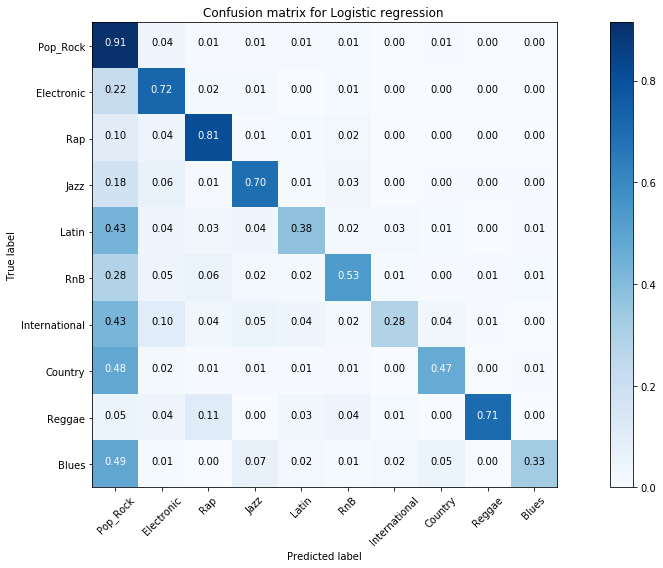

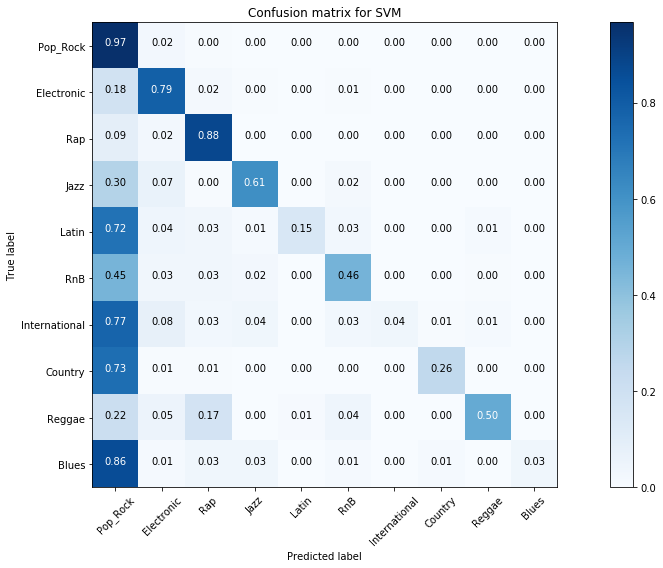

In [16]:
scaler = StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)

scaler = StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)

logregg = LogisticRegression(multi_class = "ovr").fit(train_data, train_labels)

cm = confusion_matrix(train_labels, logregg.predict(train_data))
plot_confusion_matrix(cm, classes = genres, title = "Confusion matrix for Logistic regression ")

avm = svm.SVC(decision_function_shape='ovr', probability=True).fit(train_data, train_labels)

cm = confusion_matrix(train_labels, avm.predict(train_data))
plot_confusion_matrix(cm, classes = genres,  title='Confusion matrix for SVM')


## 5. Discussion/Conclusions

Based on the results logistic regression performed the best on accuracy and SVM on log loss. Confusion matrix tells us that SVM is clearly better at predicting lebels that were abundant in the training data but logistic regression performs better on other classes. On the other hand SVM seems to also suffer more from the imbalance nature of the data since it reports higher false positive rates on Pop-Rock. 

Kaggle performance on accuracy was fairly close to our own predictions but log loss differed greatly indicating a error in calculations. 

Since accuracy only represents the ratio of correct predictions classifier could achieve high levels of accuracy by just predicting the majority class well but still be omitting some of the classes. Log loss on the other hand takes into account the uncertainty of your prediction based on how much it varies from the actual label so it could be considred to be a better measure.[2]

Our goal with this project was to get familiar with model building and find out the best performing algorithm among our candidates which we accomplished.

In the future project we could try to explore and implement more sophisitcated algorithms since neither the level of accuracy or logloss were great.

## 6. References

1. amoeba, 2014. Stack Exchange. Availabel at: https://stats.stackexchange.com/questions/109071/standardizing-features-when-using-lda-as-a-pre-processing-step [02.11.2018].

2. Deep Learning Course Wiki, 2017. Availabel at:http://wiki.fast.ai/index.php/Log_Loss [02.11.2018].